## Convert PNG files to PBM files:

In [1]:
import cv2
import os
import os
from svgpathtools import svg2paths
import matplotlib.pyplot as plt

output_dir = "./PBM"
os.makedirs(output_dir, exist_ok=True)

for i in range(1, 6):  # process from image_1 to image_5
    img_path = f"./img/image_{i}.png"
    pbm_path = f"{output_dir}/image_{i}.pbm"

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    _, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

    cv2.imwrite(pbm_path, binary)

## Use Potrace to Convert PBM files to SVG files:

In [2]:
pbm_dir = "./PBM"
svg_dir = "./SVG"

os.makedirs(svg_dir, exist_ok=True)

for i in range(1, 6): 
    pbm_path = f"{pbm_dir}/image_{i}.pbm"
    svg_path = f"{svg_dir}/image_{i}.svg"

    # check if PBM files exists
    if not os.path.exists(pbm_path):
        print(f"{pbm_path} doesn't exist")
        continue

    # Convert to SVG using Potrace
    command = f"potrace -s {pbm_path} -o {svg_path}"
    os.system(command)

## Extract the drawing strokes:
Take image_1.svg as an example

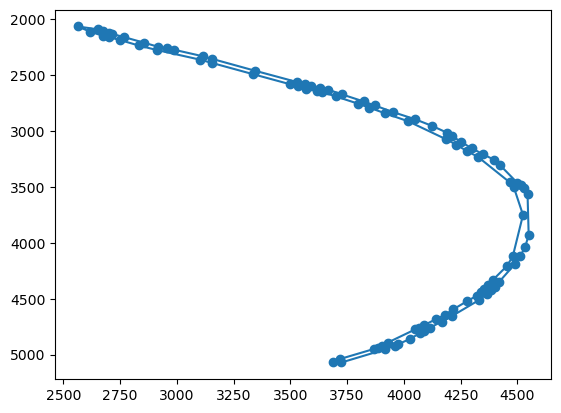

In [3]:
# Read SVG path
svg_path = "./SVG/image_1.svg"
paths, _ = svg2paths(svg_path)

# extract strokes in the pat
strokes = []
for path in paths:
    for segment in path:
        strokes.append((segment.start.real, segment.start.imag))

# visualize the path
x_vals, y_vals = zip(*strokes)
plt.plot(x_vals, y_vals, marker='o')
plt.gca().invert_yaxis()  
plt.show()


## Convert SVG to Sketch-RNN Format for all images
Sketch-RNN requires stroke data in the format: $(dx, dy, p1, p2, p3)$

In [4]:
sketch_data = []
prev_x, prev_y = strokes[0]

for x, y in strokes[1:]:
    dx = x - prev_x
    dy = y - prev_y
    sketch_data.append([dx, dy, 1, 0, 0]) 
    prev_x, prev_y = x, y

sketch_data[-1][-1] = 1

# view the Sketch-RNN input format
print(sketch_data[:10])  

[[30.0, -24.0, 1, 0, 0], [153.0, -92.0, 1, 0, 0], [14.0, -8.0, 1, 0, 0], [19.0, -20.0, 1, 0, 0], [25.0, -27.0, 1, 0, 0], [122.0, -119.0, 1, 0, 0], [15.0, -14.0, 1, 0, 0], [25.0, -25.0, 1, 0, 0], [50.0, -51.0, 1, 0, 0], [40.0, -39.0, 1, 0, 0]]


## Now store as npz format for all images

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from svgpathtools import svg2paths
import os

# Function to convert SVG paths to Sketch-RNN format
def svg_to_sketch_rnn(svg_path):
    paths, _ = svg2paths(svg_path)

    strokes = []
    for path in paths:
        for segment in path:
            strokes.append((segment.start.real, segment.start.imag))

    sketch_data = []
    prev_x, prev_y = strokes[0]

    for x, y in strokes[1:]:
        dx = x - prev_x
        dy = y - prev_y
        sketch_data.append([dx, dy, 1, 0, 0])  
        prev_x, prev_y = x, y

    sketch_data[-1][-1] = 1  # Mark the last point as the "end"
    
    return np.array(sketch_data)


svg_dir = "./SVG"
output_dir = "./data"
os.makedirs(output_dir, exist_ok=True)


for i in range(1, 6): 
    svg_path = os.path.join(svg_dir, f"image_{i}.svg")
    npz_path = os.path.join(output_dir, f"image_{i}.npz")

    # Convert SVG to Sketch-RNN format
    sketch_data = svg_to_sketch_rnn(svg_path)

    # Save as .npz file
    np.savez(npz_path, sketch_data=sketch_data)

print("All SVG files converted and saved as NPZ.")

All SVG files converted and saved as NPZ.
